In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [5]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [7]:
fraud_df.describe()


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [8]:
fraud_df.isna().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [9]:
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])

fraud_df["class"] = fraud_df["class"].astype(int)


In [10]:
fraud_df = fraud_df.dropna()


In [11]:
fraud_df = fraud_df.drop_duplicates()


In [12]:
fraud_df["class"].value_counts()


class
0    136961
1     14151
Name: count, dtype: int64

In [13]:
fraud_df["class"].value_counts(normalize=True)


class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

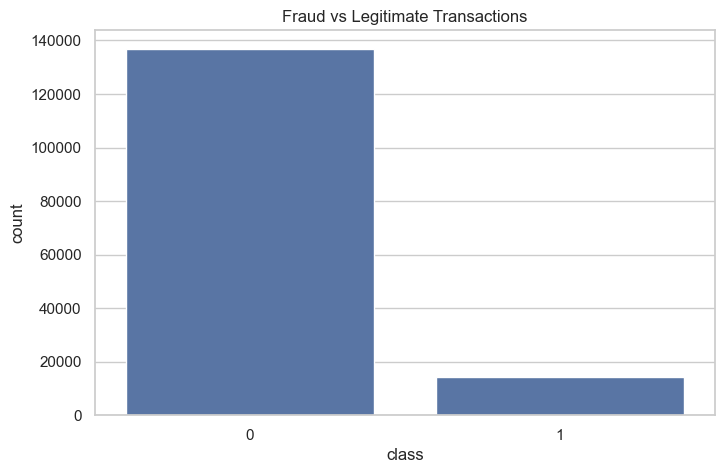

In [14]:
sns.countplot(x="class", data=fraud_df)
plt.title("Fraud vs Legitimate Transactions")
plt.show()


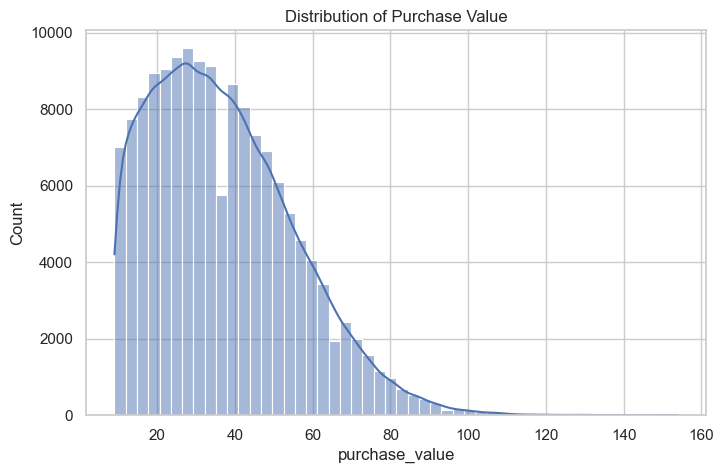

In [15]:
sns.histplot(fraud_df["purchase_value"], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.show()


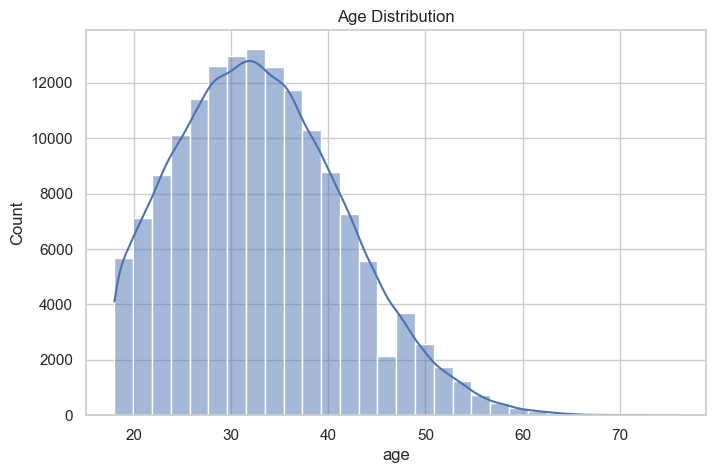

In [16]:
sns.histplot(fraud_df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


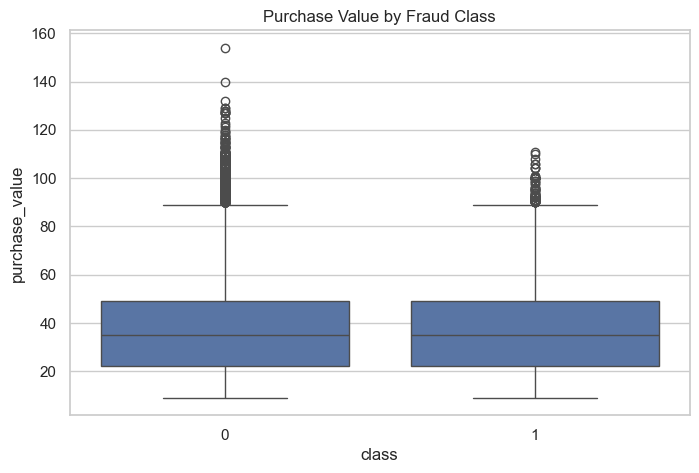

In [17]:
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.title("Purchase Value by Fraud Class")
plt.show()


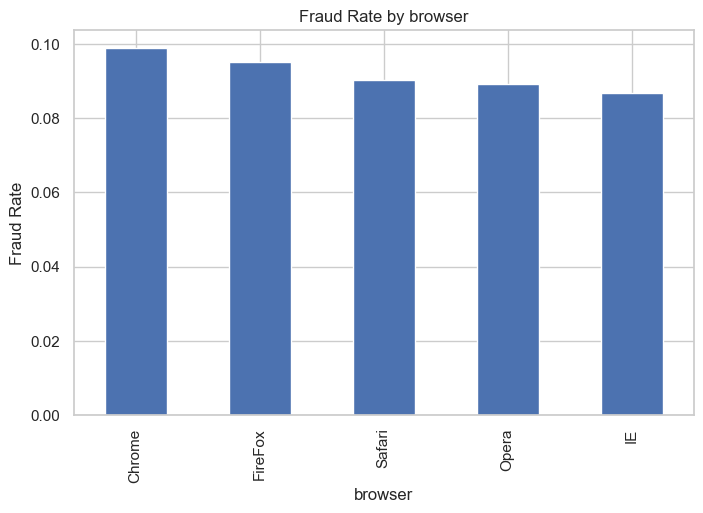

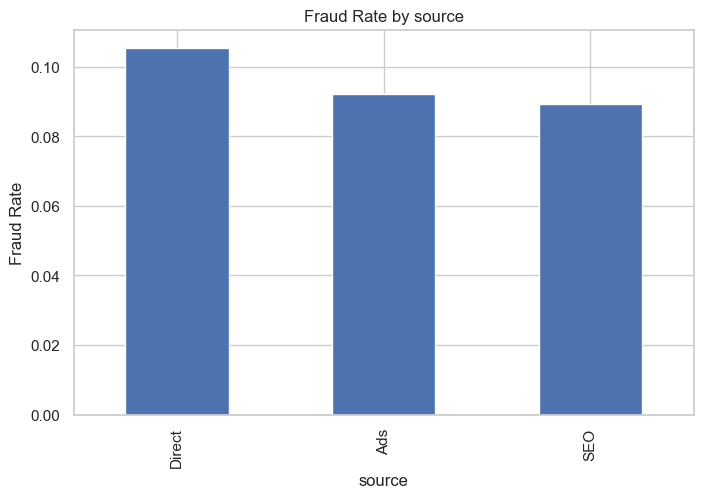

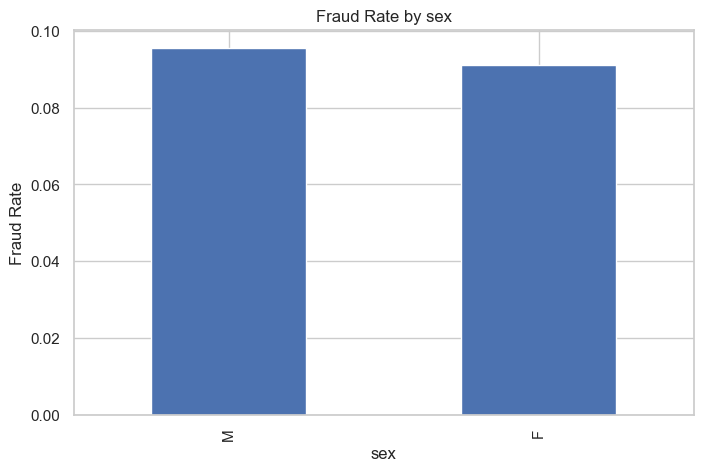

In [18]:
categorical_cols = ["browser", "source", "sex"]

for col in categorical_cols:
    fraud_df.groupby(col)["class"].mean().sort_values(
        ascending=False
    ).plot(kind="bar", title=f"Fraud Rate by {col}")
    plt.ylabel("Fraud Rate")
    plt.show()
